In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [5]:
# Load Data
# make_moons creates a dataset that's non-linearly separable — a case where K-Means struggles
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

In [7]:
# Standardize features
X_scaled = StandardScaler().fit_transform(X)

In [9]:
# Apply DBSCAN
# eps = max distance for points to be considered in the same neighborhood
# min_samples = minimum points to form a dense cluster
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [11]:
# Visualize results
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

<Figure size 800x600 with 0 Axes>

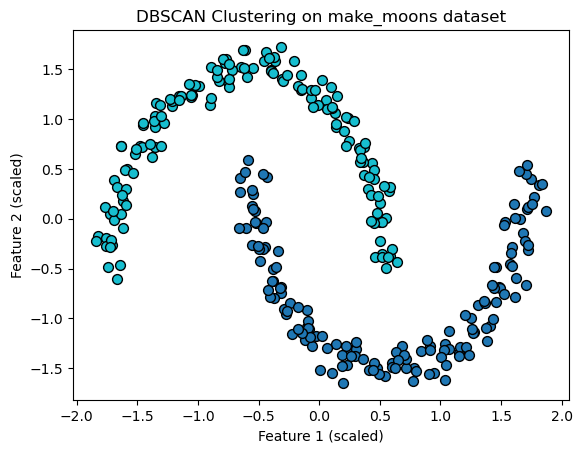

In [13]:
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Noise points (outliers)
        col = [0, 0, 0, 1]  # Black
    plt.scatter(X_scaled[class_member_mask, 0], X_scaled[class_member_mask, 1],
                c=[col], edgecolor='k', s=50)

plt.title("DBSCAN Clustering on make_moons dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [15]:
# Inspect cluster labels
print("Cluster labels assigned by DBSCAN:", np.unique(labels))

Cluster labels assigned by DBSCAN: [0 1]
